# Allgemein

- Common Voice 10h
- Datum 2025-06-09  
- Datensatz: `features_250609.csv`

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# CSV laden
df = pd.read_csv("../results/subset_10h/features_250609.csv")
df.head(5)

,filename,filepath,rms,log_energy,clipping_ratio,crest_factor,snr,hnr,f0,phoneme_entropy,...,mfcc_stat_82,mfcc_stat_83,mfcc_stat_84,mfcc_stat_85,mfcc_stat_86,mfcc_stat_87,mfcc_stat_88,mfcc_stat_89,mfcc_stat_90,mfcc_stat_91
0,common_voice_en_19226640.mp3,audio_files/common_voice_subset_10h/common_voi...,0.138755,7.460141,0.000044,7.206935,32.660786,23.016951,100.887721,5.278837,...,0.547562,-0.007316,0.163150,-0.727515,0.250416,-0.407458,-0.222167,-0.733382,-0.374494,-1.044447
1,common_voice_en_21827761.mp3,audio_files/common_voice_subset_10h/common_voi...,0.191053,8.065186,0.000011,5.234142,37.760170,26.896626,143.687073,4.621889,...,1.435388,-1.301693,0.802871,-0.316766,0.348237,1.822750,1.209734,0.444142,1.025107,-1.015493
2,common_voice_en_23830464.mp3,audio_files/common_voice_subset_10h/common_voi...,0.111006,7.192654,0.000065,9.008530,21.029661,18.278114,182.299178,5.082705,...,1.355163,1.054760,0.674304,0.288447,2.098649,-0.113771,0.202279,1.172325,-0.161523,0.262600
3,common_voice_en_32672241.mp3,audio_files/common_voice_subset_10h/common_voi...,0.105717,6.774786,0.000051,9.459203,56.915623,26.908371,195.055255,NaN,...,1.245693,4.370679,-0.707289,-0.956295,1.364398,2.262408,0.158653,0.536132,1.602167,1.672733
4,common_voice_en_25974802.mp3,audio_files/common_voice_subset_10h/common_voi...,0.160976,7.385242,0.000209,6.212097,35.451930,25.376925,102.276770,5.257475,...,-0.367300,0.764367,-0.131222,-1.173315,-1.079138,-0.744835,-0.959338,-0.493595,0.354089,0.134884


## Überblick & Datenqualität

In [2]:
# Überblick
print(f"Form der Daten: {df.shape[0]} Zeilen, {df.shape[1]} Spalten")

# Fehlende Werte
missing = df.isna().sum()
missing = missing[missing > 0]
if not missing.empty:
    print("\nFehlende Werte:")
    print(missing)
else:
    print("\nKeine fehlenden Werte.")

# Unendliche Werte
infinite = df.isin([np.inf, -np.inf]).sum()
infinite = infinite[infinite > 0]
if not infinite.empty:
    print("\nUnendliche Werte:")
    print(infinite)
else:
    print("\nKeine unendlichen Werte.")

Form der Daten: 6856 Zeilen, 123 Spalten

Fehlende Werte:
phoneme_entropy       526
rt60_reverberation      5
dtype: int64

Keine unendlichen Werte.


## Grundlegende Statistik

In [3]:
# Grundlegende Statistik
df_overview = df.drop(columns=[col for col in df.columns if col.startswith("mfcc_stat_") or col.startswith("chroma_")])
df_overview.describe().T

,count,mean,std,min,25%,50%,75%,max
rms,6856.0,0.120766,0.039805,0.000000,0.095035,0.116248,0.142184,0.687164
log_energy,6856.0,6.890412,1.725145,-49.963726,6.474583,6.972859,7.428115,10.629624
clipping_ratio,6856.0,0.000100,0.001508,0.000000,0.000026,0.000049,0.000093,0.124417
crest_factor,6856.0,9.296328,4.247911,0.000000,7.027758,8.599398,10.516564,146.576610
snr,6856.0,34.033789,21.986773,-11.612705,21.931094,32.796495,43.657037,354.981628
hnr,6856.0,21.105806,5.820546,-0.477159,17.316955,21.156837,24.983669,42.784988
f0,6856.0,144.122387,51.876291,0.000000,109.984840,132.489192,182.221496,293.788827
phoneme_entropy,6330.0,5.511059,0.762320,0.000000,5.046734,5.521578,5.974877,9.266840
rt60_reverberation,6851.0,3.499429,1.755930,0.016875,2.282188,3.335500,4.462500,24.359625
spectral_bandwidth,6856.0,1577.804368,243.971634,0.000000,1430.675024,1587.325160,1731.748240,2395.472102


# Einzelne Features

## 01 Chroma Features

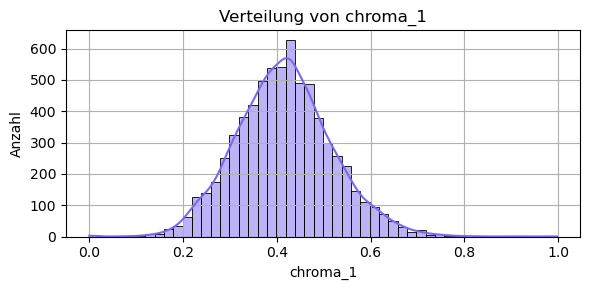

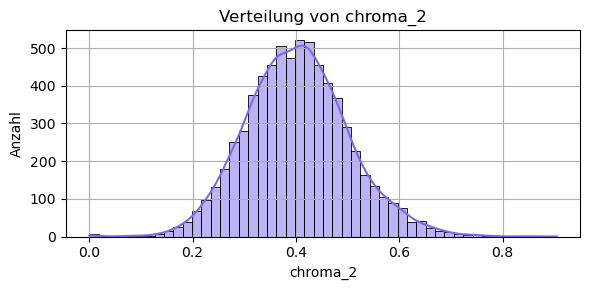

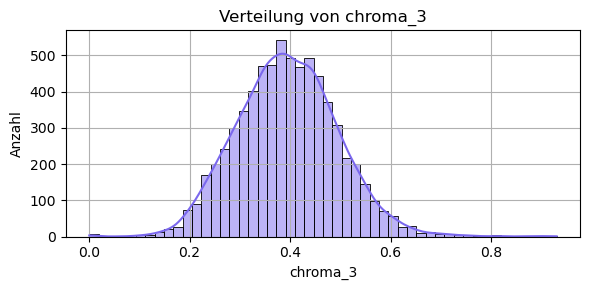

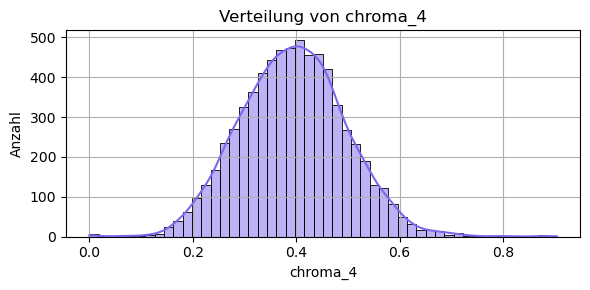

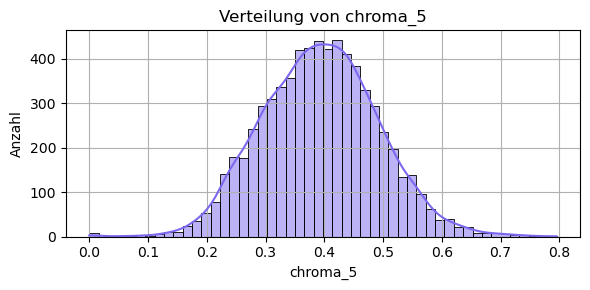

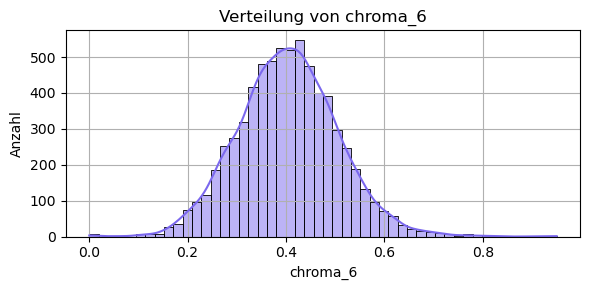

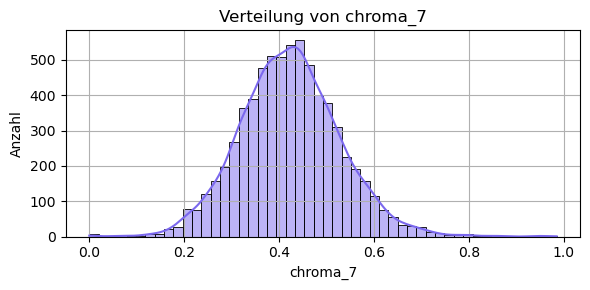

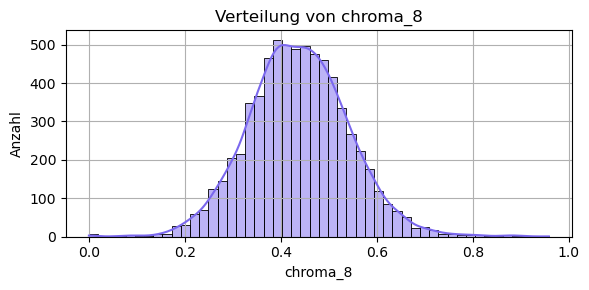

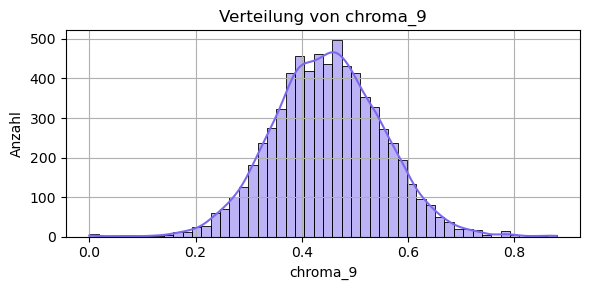

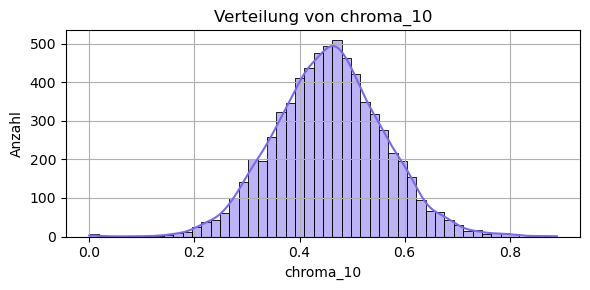

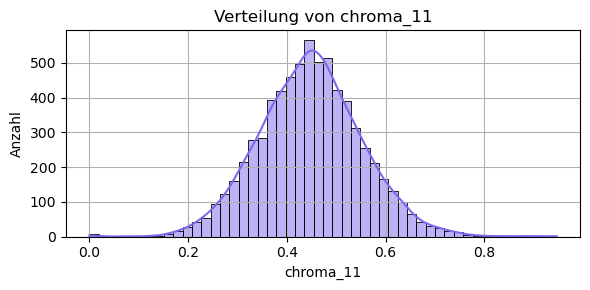

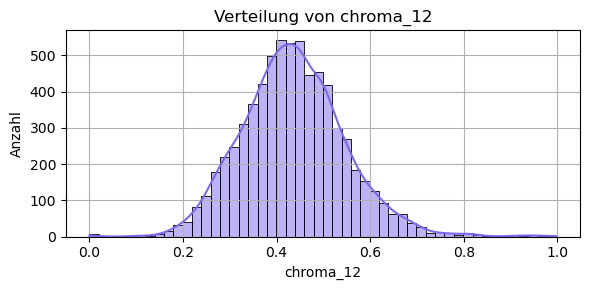

In [4]:
feature = "clipping_ratio"
chroma_cols = [f"chroma_{i}" for i in range(1, 13)]

for col in chroma_cols:
    plt.figure(figsize=(6, 3))
    sns.histplot(df[col], bins=50, kde=True, color="mediumslateblue")
    plt.title(f"Verteilung von {col}")
    plt.xlabel(col)
    plt.ylabel("Anzahl")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [5]:
df[chroma_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
chroma_1,6856.0,0.415931,0.102490,0.0,0.347865,0.414813,0.478581,0.996476
chroma_2,6856.0,0.402912,0.099607,0.0,0.335711,0.400829,0.464946,0.904650
chroma_3,6856.0,0.394426,0.099935,0.0,0.326677,0.392704,0.459591,0.930862
chroma_4,6856.0,0.393991,0.101197,0.0,0.324323,0.394173,0.460543,0.903402
chroma_5,6856.0,0.393141,0.098221,0.0,0.324509,0.393185,0.457712,0.795427
chroma_6,6856.0,0.403781,0.101618,0.0,0.337114,0.402495,0.469308,0.949844
chroma_7,6856.0,0.422962,0.105496,0.0,0.353782,0.421127,0.489586,0.985279
chroma_8,6856.0,0.436947,0.104364,0.0,0.368655,0.435106,0.503925,0.958723
chroma_9,6856.0,0.448919,0.102942,0.0,0.380922,0.448536,0.516945,0.879402
chroma_10,6856.0,0.456708,0.104066,0.0,0.388356,0.457048,0.523112,0.889135


## 02 Clipping Ratio

In [6]:
feature = "clipping_ratio"

print(f"Fehlende Werte: {df[feature].isna().sum()}")
print(f"Anzahl potenzieller Ausreißer in {feature}: {np.sum(df[feature] > (df[feature].quantile(0.75) + 1.5 * (df[feature].quantile(0.75) - df[feature].quantile(0.25)) ))}")

df[feature].describe()

Fehlende Werte: 0
Anzahl potenzieller Ausreißer in clipping_ratio: 543


count    6856.000000
mean        0.000100
std         0.001508
min         0.000000
25%         0.000026
50%         0.000049
75%         0.000093
max         0.124417
Name: clipping_ratio, dtype: float64

## 03 Crest Factor

In [7]:
feature = "crest_factor"

print(f"Fehlende Werte: {df[feature].isna().sum()}")
df[feature].describe()

Fehlende Werte: 0


count    6856.000000
mean        9.296328
std         4.247911
min         0.000000
25%         7.027758
50%         8.599398
75%        10.516564
max       146.576610
Name: crest_factor, dtype: float64

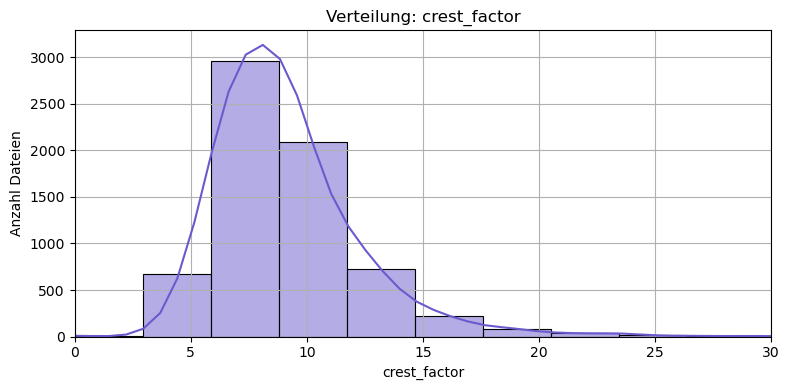

In [8]:
plt.figure(figsize=(8, 4))
sns.histplot(df[feature], bins=50, kde=True, color="slateblue")
plt.title("Verteilung: crest_factor")
plt.xlabel("crest_factor")
plt.ylabel("Anzahl Dateien")
plt.xlim(0,30)
plt.grid(True)
plt.tight_layout()
plt.show()

In [9]:
q1 = df[feature].quantile(0.25)
q3 = df[feature].quantile(0.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

outliers = df[(df[feature] < lower) | (df[feature] > upper)]

print(f"Potenzielle Ausreißer in f0: {len(outliers)}")
print(f"Minimum: {df[feature].min():.2f}")
print(f"Maximum: {df[feature].max():.2f}")

Potenzielle Ausreißer in f0: 295
Minimum: 0.00
Maximum: 146.58


## 04 Fudamental Frequency (f0)

In [10]:
feature = "f0"

print(f"Fehlende Werte: {df[feature].isna().sum()}")
print(df[feature].describe())

Fehlende Werte: 0
count    6856.000000
mean      144.122387
std        51.876291
min         0.000000
25%       109.984840
50%       132.489192
75%       182.221496
max       293.788827
Name: f0, dtype: float64


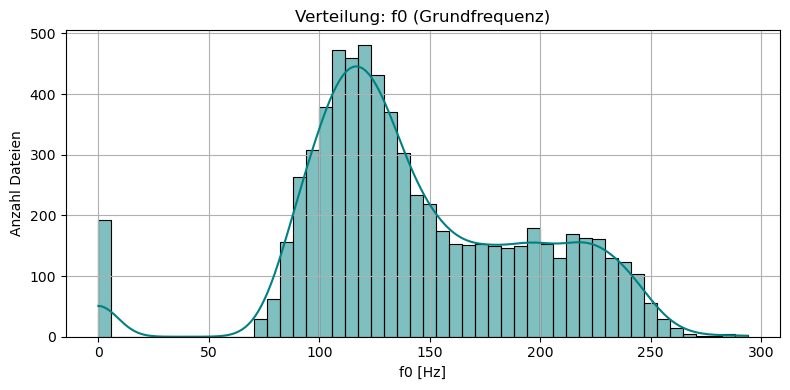

In [11]:
plt.figure(figsize=(8, 4))
sns.histplot(df[feature].dropna(), bins=50, kde=True, color="teal")
plt.title("Verteilung: f0 (Grundfrequenz)")
plt.xlabel("f0 [Hz]")
plt.ylabel("Anzahl Dateien")
plt.grid(True)
plt.tight_layout()
plt.show()

In [12]:
q1 = df[feature].quantile(0.25)
q3 = df[feature].quantile(0.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

outliers = df[(df[feature] < lower) | (df[feature] > upper)]

print(f"Potenzielle Ausreißer in f0: {len(outliers)}")
print(f"Minimum: {df[feature].min():.2f}")
print(f"Maximum: {df[feature].max():.2f}")

Potenzielle Ausreißer in f0: 193
Minimum: 0.00
Maximum: 293.79


## 05 Harmonics-to-Noise Ratio (HNR)

In [13]:
feature = "hnr"

print(f"Fehlende Werte: {df[feature].isna().sum()}")
print(df[feature].describe())

Fehlende Werte: 0
count    6856.000000
mean       21.105806
std         5.820546
min        -0.477159
25%        17.316955
50%        21.156837
75%        24.983669
max        42.784988
Name: hnr, dtype: float64


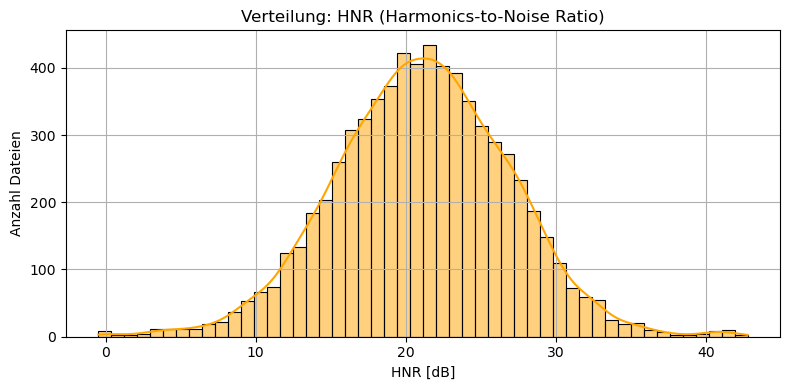

In [14]:
plt.figure(figsize=(8, 4))
sns.histplot(df[feature].dropna(), bins=50, kde=True, color="orange")
plt.title("Verteilung: HNR (Harmonics-to-Noise Ratio)")
plt.xlabel("HNR [dB]")
plt.ylabel("Anzahl Dateien")
plt.grid(True)
plt.tight_layout()
plt.show()

In [15]:
q1 = df[feature].quantile(0.25)
q3 = df[feature].quantile(0.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

outliers = df[(df[feature] < lower) | (df[feature] > upper)]

print(f"Potenzielle Ausreißer in {feature}: {len(outliers)}")
print(f"Minimum: {df[feature].min():.2f}")
print(f"Maximum: {df[feature].max():.2f}")

Potenzielle Ausreißer in hnr: 96
Minimum: -0.48
Maximum: 42.78


## 06 Log Energy

In [16]:
feature = "log_energy"

print(f"Fehlende Werte: {df[feature].isna().sum()}")
print(df[feature].describe())

Fehlende Werte: 0
count    6856.000000
mean        6.890412
std         1.725145
min       -49.963726
25%         6.474583
50%         6.972859
75%         7.428115
max        10.629624
Name: log_energy, dtype: float64


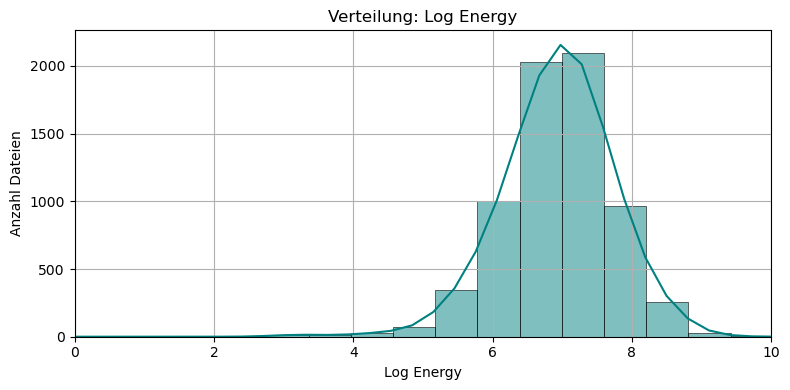

In [17]:
plt.figure(figsize=(8, 4))
sns.histplot(df[feature].dropna(), bins=100, kde=True, color="teal")
plt.title("Verteilung: Log Energy")
plt.xlabel("Log Energy")
plt.ylabel("Anzahl Dateien")
plt.xlim(0,10)
plt.grid(True)
plt.tight_layout()
plt.show()

In [18]:
q1 = df[feature].quantile(0.25)
q3 = df[feature].quantile(0.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

outliers = df[(df[feature] < lower) | (df[feature] > upper)]

print(f"Potenzielle Ausreißer in {feature}: {len(outliers)}")
print(f"Minimum: {df[feature].min():.4f}")
print(f"Maximum: {df[feature].max():.4f}")

Potenzielle Ausreißer in log_energy: 127
Minimum: -49.9637
Maximum: 10.6296


## 07 Loudness Range

In [19]:
feature = "loudness_range"

print(f"Fehlende Werte: {df[feature].isna().sum()}")
print(df[feature].describe())

Fehlende Werte: 0
count    6856.000000
mean       59.770632
std        26.023288
min         0.000000
25%        49.476740
50%        59.014452
75%        69.310431
max       450.692780
Name: loudness_range, dtype: float64


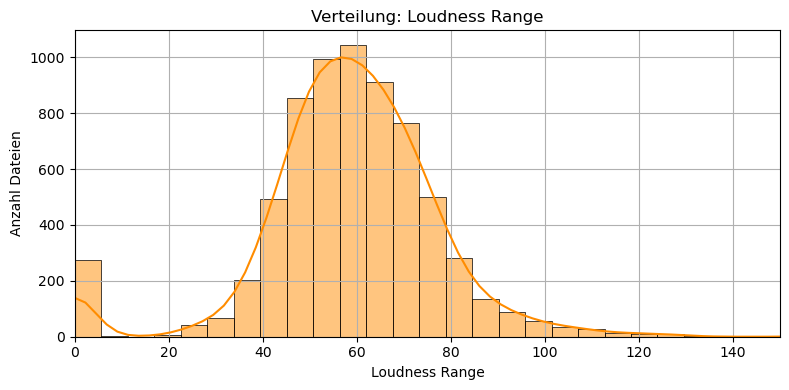

In [20]:
plt.figure(figsize=(8, 4))
sns.histplot(df[feature].dropna(), bins=80, kde=True, color="darkorange")
plt.title("Verteilung: Loudness Range")
plt.xlabel("Loudness Range")
plt.ylabel("Anzahl Dateien")
plt.xlim(0,150)
plt.grid(True)
plt.tight_layout()
plt.show()

In [21]:
q1 = df[feature].quantile(0.25)
q3 = df[feature].quantile(0.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

outliers = df[(df[feature] < lower) | (df[feature] > upper)]

print(f"Potenzielle Ausreißer in {feature}: {len(outliers)}")
print(f"Minimum: {df[feature].min():.4f}")
print(f"Maximum: {df[feature].max():.4f}")

Potenzielle Ausreißer in loudness_range: 445
Minimum: 0.0000
Maximum: 450.6928


## 08 MFCC

In [22]:
mean_cols = [f"mfcc_stat_{i}" for i in range(1, 14)]
df[mean_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
mfcc_stat_1,6856.0,-291.140987,67.174975,-1131.370972,-327.082625,-290.088240,-253.927905,78.375120
mfcc_stat_2,6856.0,78.956802,26.318696,-17.093195,60.904398,79.131542,96.139758,171.723240
mfcc_stat_3,6856.0,2.102117,18.566658,-75.602430,-9.923044,2.675245,14.401893,84.497850
mfcc_stat_4,6856.0,20.272087,14.450242,-59.723860,10.662748,20.333897,29.669314,87.329956
mfcc_stat_5,6856.0,-4.687845,12.685766,-62.553436,-13.015621,-4.350266,4.137730,43.696020
mfcc_stat_6,6856.0,-2.420642,10.542601,-44.967373,-9.271101,-2.002943,4.593343,35.579570
mfcc_stat_7,6856.0,-10.925803,10.007504,-48.586600,-17.480207,-10.541380,-3.962985,44.892220
mfcc_stat_8,6856.0,-5.534233,8.563015,-37.034300,-11.117721,-5.357602,0.219120,34.174053
mfcc_stat_9,6856.0,-7.737744,7.911015,-40.348843,-12.793550,-7.466919,-2.460513,21.810675
mfcc_stat_10,6856.0,-3.683071,6.821687,-32.548780,-7.924805,-3.536599,0.732422,25.391720


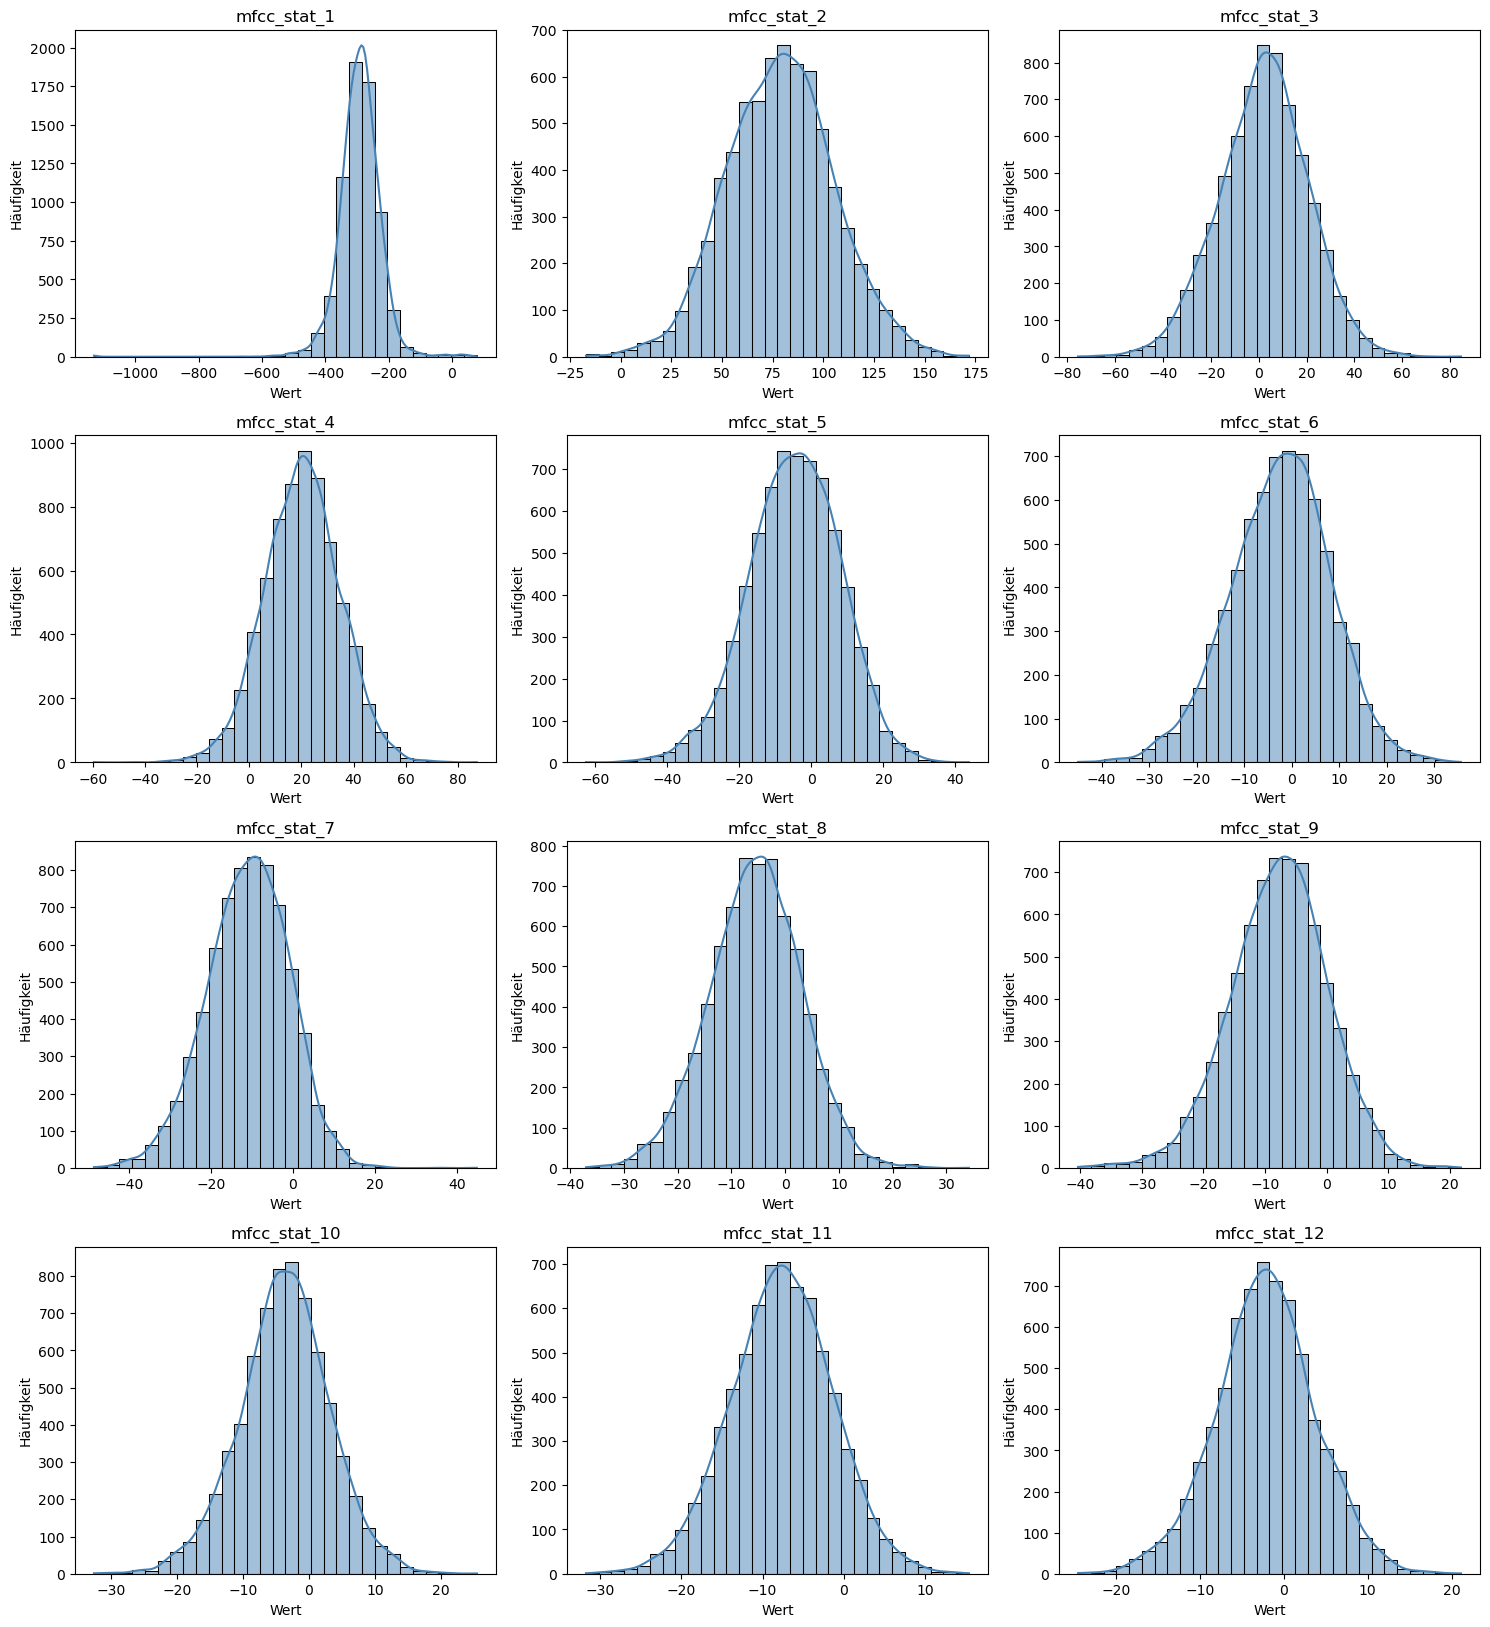

In [23]:
# Liste der ersten 13 MFCC-Mittelwerte
mfcc_mean_cols = [f"mfcc_stat_{i}" for i in range(1, 13)]

# Plots anlegen
plt.figure(figsize=(15, 20))
for i, col in enumerate(mfcc_mean_cols, 1):
    plt.subplot(5, 3, i)
    sns.histplot(df[col], bins=30, kde=True, color="steelblue")
    plt.title(col)
    plt.xlabel("Wert")
    plt.ylabel("Häufigkeit")

plt.tight_layout()
plt.show()

## 09 Phoneme Entropy

In [24]:
feature = "phoneme_entropy"

print(f"Fehlende Werte: {df[feature].isna().sum()}")
print(df[feature].describe())

Fehlende Werte: 526
count    6330.000000
mean        5.511059
std         0.762320
min         0.000000
25%         5.046734
50%         5.521578
75%         5.974877
max         9.266840
Name: phoneme_entropy, dtype: float64


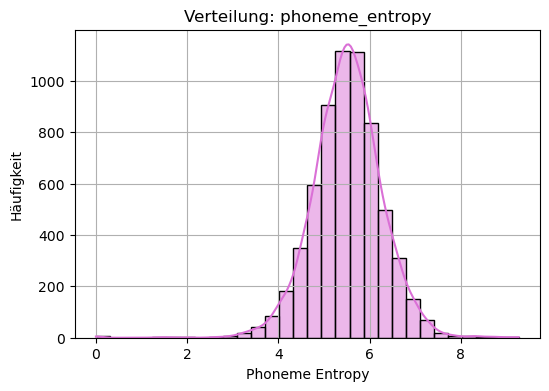

In [25]:
plt.figure(figsize=(6, 4))
sns.histplot(df[feature], bins=30, kde=True, color="orchid")
plt.title(f"Verteilung: {feature}")
plt.xlabel("Phoneme Entropy")
plt.ylabel("Häufigkeit")
plt.grid(True)
plt.show()

In [26]:
q1 = df[feature].quantile(0.25)
q3 = df[feature].quantile(0.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr
outliers = df[(df[feature] < lower) | (df[feature] > upper)]

print("Anzahl potenzieller Ausreißer:", len(outliers))
print("Min/Max:", df[feature].min(), df[feature].max())

Anzahl potenzieller Ausreißer: 116
Min/Max: 0.0 9.26684


## 10 Reverberation

In [27]:
feature = "rt60_reverberation"

print(f"Fehlende Werte: {df[feature].isna().sum()}")
print(df[feature].describe())

Fehlende Werte: 5
count    6851.000000
mean        3.499429
std         1.755930
min         0.016875
25%         2.282188
50%         3.335500
75%         4.462500
max        24.359625
Name: rt60_reverberation, dtype: float64


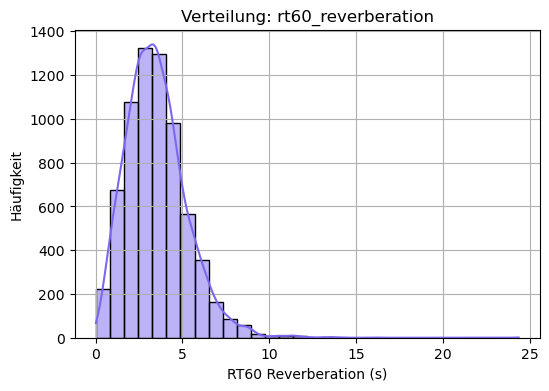

In [28]:
plt.figure(figsize=(6, 4))
sns.histplot(df[feature], bins=30, kde=True, color="mediumslateblue")
plt.title(f"Verteilung: {feature}")
plt.xlabel("RT60 Reverberation (s)")
plt.ylabel("Häufigkeit")
plt.grid(True)
plt.show()

In [29]:
q1 = df[feature].quantile(0.25)
q3 = df[feature].quantile(0.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr
outliers = df[(df[feature] < lower) | (df[feature] > upper)]

print("Anzahl potenzieller Ausreißer:", len(outliers))
print("Min/Max:", df[feature].min(), df[feature].max())

Anzahl potenzieller Ausreißer: 134
Min/Max: 0.0168749999999997 24.359625


## 11 RMS

In [30]:
feature = "rms"

print(f"Fehlende Werte: {df[feature].isna().sum()}")
print(df[feature].describe())

Fehlende Werte: 0
count    6856.000000
mean        0.120766
std         0.039805
min         0.000000
25%         0.095035
50%         0.116248
75%         0.142184
max         0.687164
Name: rms, dtype: float64


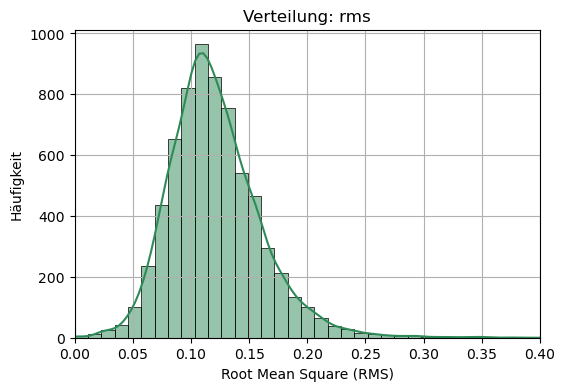

In [31]:
plt.figure(figsize=(6, 4))
sns.histplot(df[feature], bins=60, kde=True, color="seagreen")
plt.title(f"Verteilung: {feature}")
plt.xlabel("Root Mean Square (RMS)")
plt.ylabel("Häufigkeit")
plt.xlim(0,0.4)
plt.grid(True)
plt.show()

In [32]:
q1 = df[feature].quantile(0.25)
q3 = df[feature].quantile(0.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr
outliers = df[(df[feature] < lower) | (df[feature] > upper)]

print("Anzahl potenzieller Ausreißer:", len(outliers))
print("Min/Max:", df[feature].min(), df[feature].max())

Anzahl potenzieller Ausreißer: 171
Min/Max: 0.0 0.6871641


## 12 SNR

In [33]:
feature = "snr"

print(f"Fehlende Werte: {df[feature].isna().sum()}")
print(df[feature].describe())

Fehlende Werte: 0
count    6856.000000
mean       34.033789
std        21.986773
min       -11.612705
25%        21.931094
50%        32.796495
75%        43.657037
max       354.981628
Name: snr, dtype: float64


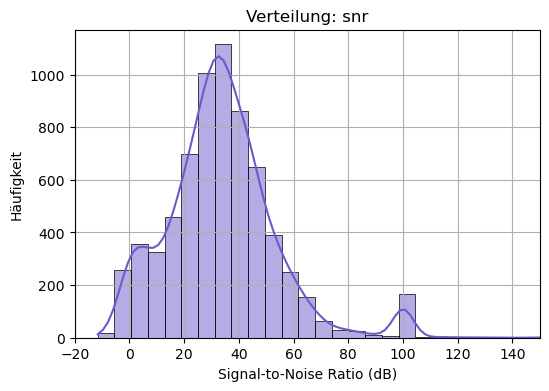

In [34]:
plt.figure(figsize=(6, 4))
sns.histplot(df[feature], bins=60, kde=True, color="slateblue")
plt.title(f"Verteilung: {feature}")
plt.xlabel("Signal-to-Noise Ratio (dB)")
plt.ylabel("Häufigkeit")
plt.xlim(-20,150)
plt.grid(True)
plt.show()

In [35]:
q1 = df[feature].quantile(0.25)
q3 = df[feature].quantile(0.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr
outliers = df[(df[feature] < lower) | (df[feature] > upper)]

print("Anzahl potenzieller Ausreißer:", len(outliers))
print("Min/Max:", df[feature].min(), df[feature].max())

Anzahl potenzieller Ausreißer: 249
Min/Max: -11.61270523071289 354.98162841796875


## 13 Spectral Bandwidth

In [36]:
feature = "spectral_bandwidth"

print(f"Fehlende Werte: {df[feature].isna().sum()}")
print(df[feature].describe())

Fehlende Werte: 0
count    6856.000000
mean     1577.804368
std       243.971634
min         0.000000
25%      1430.675024
50%      1587.325160
75%      1731.748240
max      2395.472102
Name: spectral_bandwidth, dtype: float64


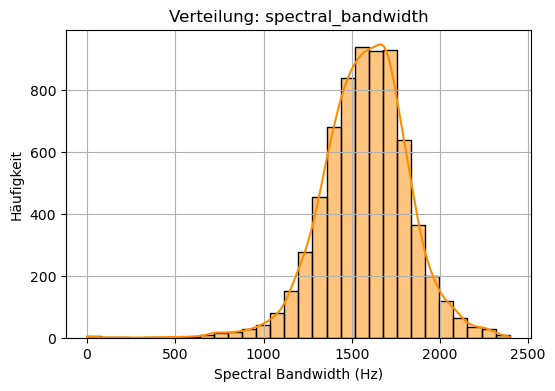

In [37]:
plt.figure(figsize=(6, 4))
sns.histplot(df[feature], bins=30, kde=True, color="darkorange")
plt.title(f"Verteilung: {feature}")
plt.xlabel("Spectral Bandwidth (Hz)")
plt.ylabel("Häufigkeit")
plt.grid(True)
plt.show()

In [38]:
q1 = df[feature].quantile(0.25)
q3 = df[feature].quantile(0.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr
outliers = df[(df[feature] < lower) | (df[feature] > upper)]

print("Anzahl potenzieller Ausreißer:", len(outliers))
print("Min/Max:", df[feature].min(), df[feature].max())

Anzahl potenzieller Ausreißer: 155
Min/Max: 0.0 2395.4721017530355


## 14 Spectral Centroid

In [39]:
feature = "spectral_centroid"

print(f"Fehlende Werte: {df[feature].isna().sum()}")
print(df[feature].describe())

Fehlende Werte: 0
count    6856.000000
mean     1873.209580
std       444.204244
min         0.000000
25%      1562.560117
50%      1856.772688
75%      2162.858052
max      3832.800793
Name: spectral_centroid, dtype: float64


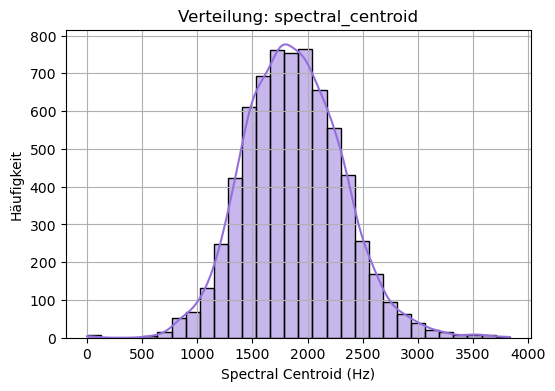

In [40]:
plt.figure(figsize=(6, 4))
sns.histplot(df[feature], bins=30, kde=True, color="mediumpurple")
plt.title(f"Verteilung: {feature}")
plt.xlabel("Spectral Centroid (Hz)")
plt.ylabel("Häufigkeit")
plt.grid(True)
plt.show()

In [41]:
q1 = df[feature].quantile(0.25)
q3 = df[feature].quantile(0.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr
outliers = df[(df[feature] < lower) | (df[feature] > upper)]

print("Anzahl potenzieller Ausreißer:", len(outliers))
print("Min/Max:", df[feature].min(), df[feature].max())

Anzahl potenzieller Ausreißer: 71
Min/Max: 0.0 3832.800792627359


## 15 Spectral Contrast

In [42]:
# Feature-Name
feature = "spectral_contrast"

# 1. Umwandeln der Strings (ohne Kommas) zu Arrays
df[feature] = df[feature].apply(
    lambda x: np.fromstring(x.strip("[]"), sep=" ") if isinstance(x, str) else np.array(x)
)

# 2. Zu DataFrame umwandeln für separate Spalten
contrast_array = np.vstack(df[feature].values)
contrast_df = pd.DataFrame(contrast_array, columns=[f"{feature}_band{i+1}" for i in range(contrast_array.shape[1])])

# 3. Statistische Übersicht je Band
display(contrast_df.describe().T)



,count,mean,std,min,25%,50%,75%,max
spectral_contrast_band1,6856.0,20.241195,2.526333,0.0,18.693127,20.293756,21.817702,35.188855
spectral_contrast_band2,6856.0,15.620175,1.941011,0.0,14.297492,15.431875,16.769270,23.012702
spectral_contrast_band3,6856.0,18.459368,1.947648,0.0,17.162430,18.400431,19.733512,25.444099
spectral_contrast_band4,6856.0,17.757256,1.856355,0.0,16.537553,17.542886,18.734498,46.818723
spectral_contrast_band5,6856.0,18.796831,1.919595,0.0,17.513404,18.646618,19.930551,27.116370
spectral_contrast_band6,6856.0,21.311419,3.678739,0.0,19.208022,20.868027,22.933545,59.424917
spectral_contrast_band7,6856.0,52.855993,3.950739,0.0,51.501635,52.960400,54.657712,66.420205


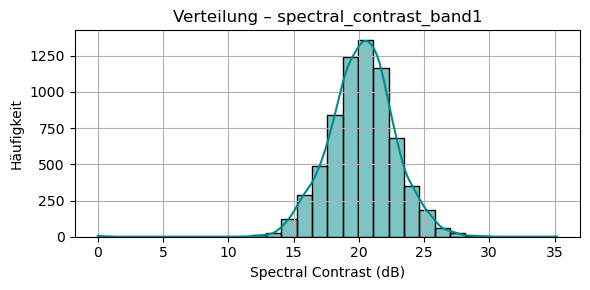

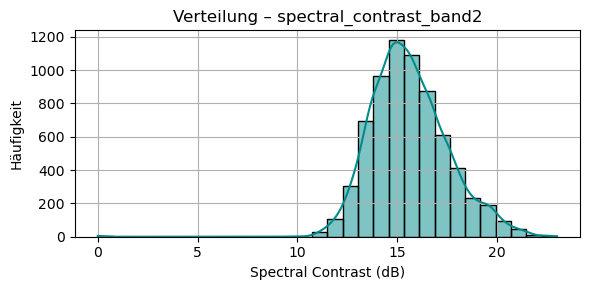

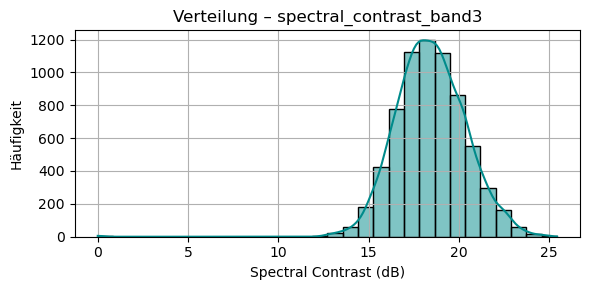

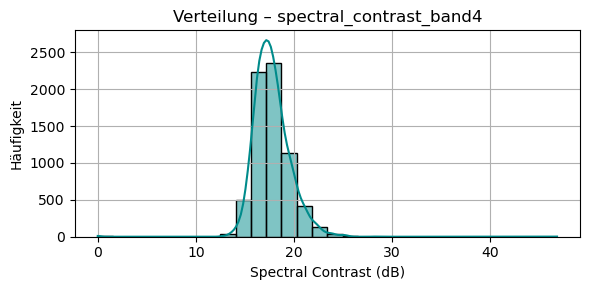

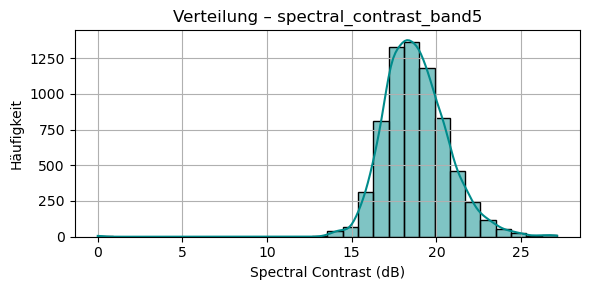

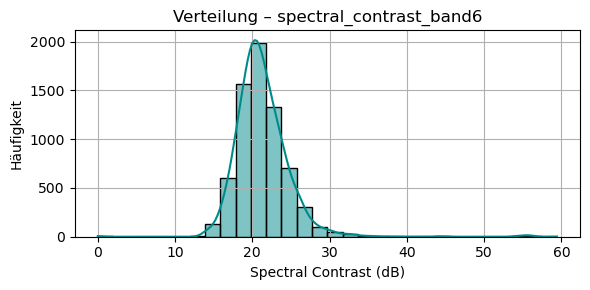

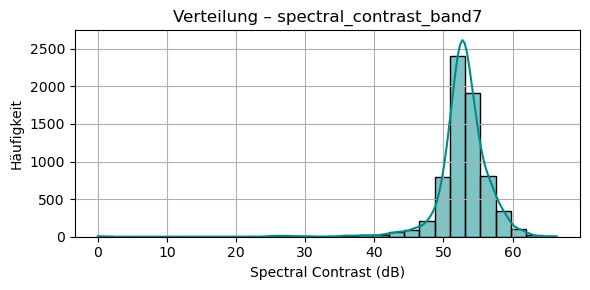

In [43]:
# 4. Histogramme pro Frequenzband
import matplotlib.pyplot as plt
import seaborn as sns

for col in contrast_df.columns:
    plt.figure(figsize=(6, 3))
    sns.histplot(contrast_df[col], bins=30, kde=True, color="#008B8B")
    plt.title(f"Verteilung – {col}")
    plt.xlabel("Spectral Contrast (dB)")
    plt.ylabel("Häufigkeit")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

## 16 Spectral Entropy

In [44]:
feature = "spectral_entropy"

print(f"Fehlende Werte: {df[feature].isna().sum()}")
print(df[feature].describe())

Fehlende Werte: 0
count    6856.000000
mean        3.251790
std         0.491080
min         0.000000
25%         2.954682
50%         3.256874
75%         3.548730
max         5.722334
Name: spectral_entropy, dtype: float64


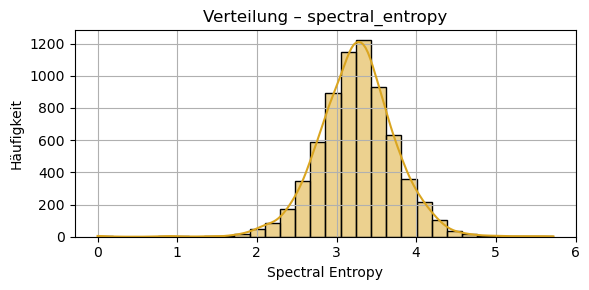

In [45]:
# Histogramm
plt.figure(figsize=(6, 3))
sns.histplot(df[feature], bins=30, kde=True, color = "#DAA520")
plt.title(f"Verteilung – {feature}")
plt.xlabel("Spectral Entropy")
plt.ylabel("Häufigkeit")
plt.grid(True)
plt.tight_layout()
plt.show()

In [46]:
q1 = df[feature].quantile(0.25)
q3 = df[feature].quantile(0.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr
outliers = df[(df[feature] < lower) | (df[feature] > upper)]

print("Anzahl potenzieller Ausreißer:", len(outliers))
print("Min/Max:", df[feature].min(), df[feature].max())

Anzahl potenzieller Ausreißer: 138
Min/Max: 0.0 5.722334


## 17 Spectral Flatness

In [47]:
feature = "spectral_flatness"

print(f"Fehlende Werte: {df[feature].isna().sum()}")
print(df[feature].describe())

Fehlende Werte: 0
count    6856.000000
mean        0.049551
std         0.064998
min         0.000023
25%         0.018551
50%         0.032313
75%         0.056344
max         1.000001
Name: spectral_flatness, dtype: float64


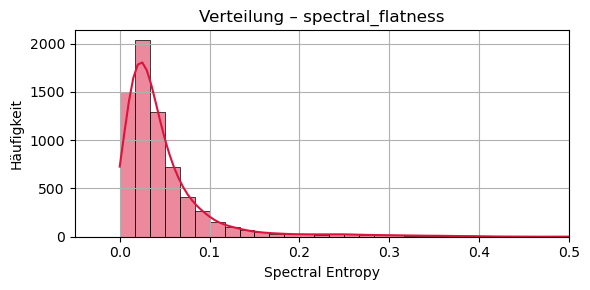

In [48]:
# Histogramm
plt.figure(figsize=(6, 3))
sns.histplot(df[feature], bins=60, kde=True, color = "#DC143C")
plt.title(f"Verteilung – {feature}")
plt.xlabel("Spectral Entropy")
plt.ylabel("Häufigkeit")
plt.xlim(-0.05,0.5)
plt.grid(True)
plt.tight_layout()
plt.show()

In [49]:
q1 = df[feature].quantile(0.25)
q3 = df[feature].quantile(0.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr
outliers = df[(df[feature] < lower) | (df[feature] > upper)]

print("Anzahl potenzieller Ausreißer:", len(outliers))
print("Min/Max:", df[feature].min(), df[feature].max())

Anzahl potenzieller Ausreißer: 510
Min/Max: 2.3024264e-05 1.0000008


## 18 Spectral Rolloff

In [50]:
feature = "spectral_rolloff"

print(f"Fehlende Werte: {df[feature].isna().sum()}")
print(df[feature].describe())

Fehlende Werte: 0
count    6856.000000
mean     3484.560719
std       776.587536
min         0.000000
25%      2961.487995
50%      3501.205888
75%      3994.581887
max      6512.728987
Name: spectral_rolloff, dtype: float64


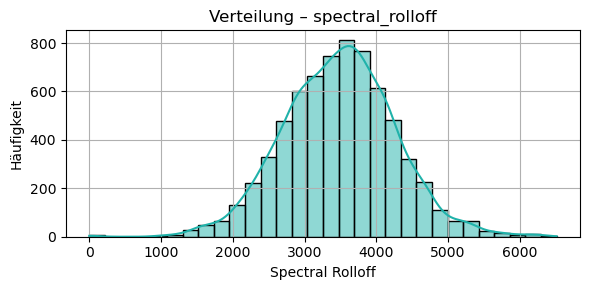

In [51]:
# Histogramm
plt.figure(figsize=(6, 3))
sns.histplot(df[feature], bins=30, kde=True, color = "#20B2AA")
plt.title(f"Verteilung – {feature}")
plt.xlabel("Spectral Rolloff")
plt.ylabel("Häufigkeit")
#plt.xlim(-0.05,0.5)
plt.grid(True)
plt.tight_layout()
plt.show()

In [52]:
q1 = df[feature].quantile(0.25)
q3 = df[feature].quantile(0.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr
outliers = df[(df[feature] < lower) | (df[feature] > upper)]

print("Anzahl potenzieller Ausreißer:", len(outliers))
print("Min/Max:", df[feature].min(), df[feature].max())

Anzahl potenzieller Ausreißer: 77
Min/Max: 0.0 6512.728987068966


## 19 Spectral Flatness

In [53]:
feature = "spectral_flatness"

print(f"Fehlende Werte: {df[feature].isna().sum()}")
print(df[feature].describe())

Fehlende Werte: 0
count    6856.000000
mean        0.049551
std         0.064998
min         0.000023
25%         0.018551
50%         0.032313
75%         0.056344
max         1.000001
Name: spectral_flatness, dtype: float64


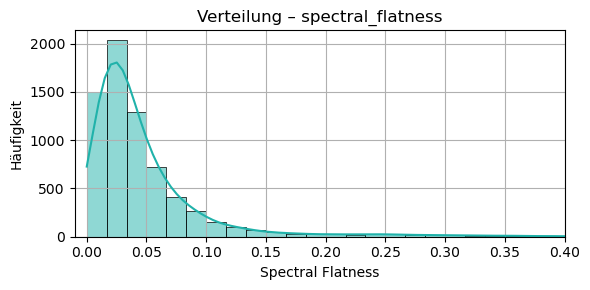

In [54]:
# Histogramm
plt.figure(figsize=(6, 3))
sns.histplot(df[feature], bins=60, kde=True, color = "#20B2AA")
plt.title(f"Verteilung – {feature}")
plt.xlabel("Spectral Flatness")
plt.ylabel("Häufigkeit")
plt.xlim(-0.01,0.4)
plt.grid(True)
plt.tight_layout()
plt.show()

In [55]:
q1 = df[feature].quantile(0.25)
q3 = df[feature].quantile(0.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr
outliers = df[(df[feature] < lower) | (df[feature] > upper)]

print("Anzahl potenzieller Ausreißer:", len(outliers))
print("Min/Max:", df[feature].min(), df[feature].max())

Anzahl potenzieller Ausreißer: 510
Min/Max: 2.3024264e-05 1.0000008


## 20 Voice Activity Detection (VAD)

In [56]:
feature = "vad"

print(f"Fehlende Werte: {df[feature].isna().sum()}")
print(df[feature].describe())

Fehlende Werte: 0
count    6856.000000
mean       47.491985
std        14.206032
min         0.000000
25%        39.170600
50%        48.232691
75%        56.216216
max       100.000000
Name: vad, dtype: float64


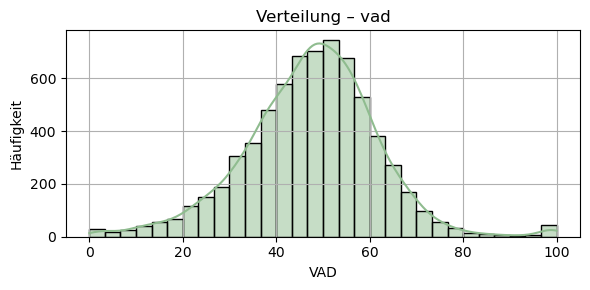

In [57]:
# Histogramm
plt.figure(figsize=(6, 3))
sns.histplot(df[feature], bins=30, kde=True, color = "#8FBC8F")
plt.title(f"Verteilung – {feature}")
plt.xlabel("VAD")
plt.ylabel("Häufigkeit")
#plt.xlim(-0.01,0.4)
plt.grid(True)
plt.tight_layout()
plt.show()

In [58]:
q1 = df[feature].quantile(0.25)
q3 = df[feature].quantile(0.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr
outliers = df[(df[feature] < lower) | (df[feature] > upper)]

print("Anzahl potenzieller Ausreißer:", len(outliers))
print("Min/Max:", df[feature].min(), df[feature].max())

Anzahl potenzieller Ausreißer: 202
Min/Max: 0.0 100.0


## 21 Zero Crossing Rate (ZCR)

In [59]:
feature = "zcr"

print(f"Fehlende Werte: {df[feature].isna().sum()}")
print(df[feature].describe())

Fehlende Werte: 0
count    6856.000000
mean        0.162555
std         0.056283
min         0.000000
25%         0.122766
50%         0.157775
75%         0.196825
max         0.530709
Name: zcr, dtype: float64


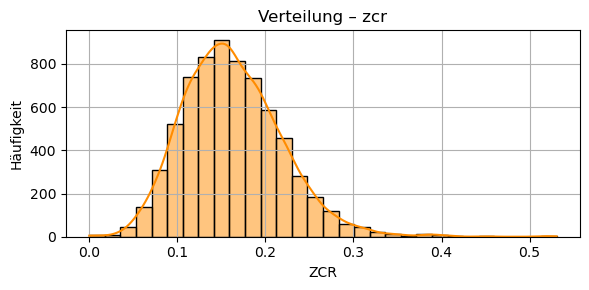

In [60]:
# Histogramm
plt.figure(figsize=(6, 3))
sns.histplot(df[feature], bins=30, kde=True, color = "#FF8C00")
plt.title(f"Verteilung – {feature}")
plt.xlabel("ZCR")
plt.ylabel("Häufigkeit")
#plt.xlim(-0.01,0.4)
plt.grid(True)
plt.tight_layout()
plt.show()

In [61]:
q1 = df[feature].quantile(0.25)
q3 = df[feature].quantile(0.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr
outliers = df[(df[feature] < lower) | (df[feature] > upper)]

print("Anzahl potenzieller Ausreißer:", len(outliers))
print("Min/Max:", df[feature].min(), df[feature].max())

Anzahl potenzieller Ausreißer: 94
Min/Max: 0.0 0.5307088
